In [41]:
import numpy
import math
import vortex
from matplotlib import pyplot
%matplotlib inline

In [42]:
N= 50
x_start, x_end = (-4, 4)
y_start, y_end = (-2, 2)
x = numpy.linspace(x_start, x_end, N)
y = numpy.linspace(y_start, y_end, N)
X, Y = numpy.meshgrid(x,y)

In [79]:
#vortex
gamma, xv, yv =5.0, 0.0, 0.0

u_vor, v_vor = vortex.vor(gamma, xv, yv, X, Y)

#boublet

strength , x_doublet, y_doublet = 5, 0.0, 0.0
u_doublet, v_doublet = vortex.vel(strength, x_doublet, y_doublet, X, Y)

#freestream
u_inf = 1.0
u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)

In [80]:
u = u_vor + u_doublet + u_freestream
v = v_vor + v_doublet + v_freestream

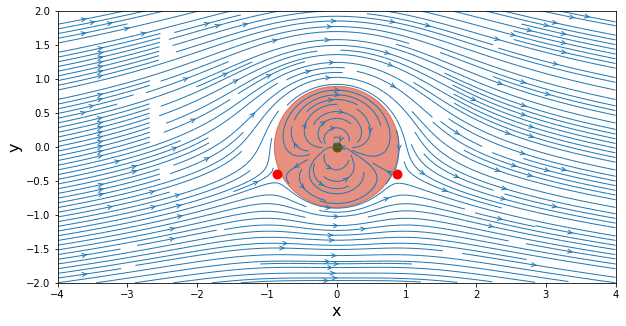

In [82]:
R = numpy.sqrt(strength/(2*math.pi*u_inf))

ys1= -gamma/(4*math.pi*u_inf)
xs1= numpy.sqrt(R**2-ys**2)
xs2= -numpy.sqrt(R**2-ys**2)
ys2=-gamma/(4*math.pi*u_inf)

width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(xv, yv, color='g', s=80, marker='o');
pyplot.scatter(xs1, ys1, color='r', s=80, marker='o');
pyplot.scatter(xs2, ys2, color='r', s=80, marker='o');

circle = pyplot.Circle((0, 0), radius=R, color='#CD2305', alpha=0.5)
pyplot.gca().add_patch(circle)

